<h3><b>Exercise set 3 - seaborn-module and data exploration</b></h3>

<h4><b>1. In this exercise, use the 'penguins' dataset from seaborn! </b></h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load example dataset from seaborn
df = sns.load_dataset('penguins')
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

#### Basic pairplot to check what data we have

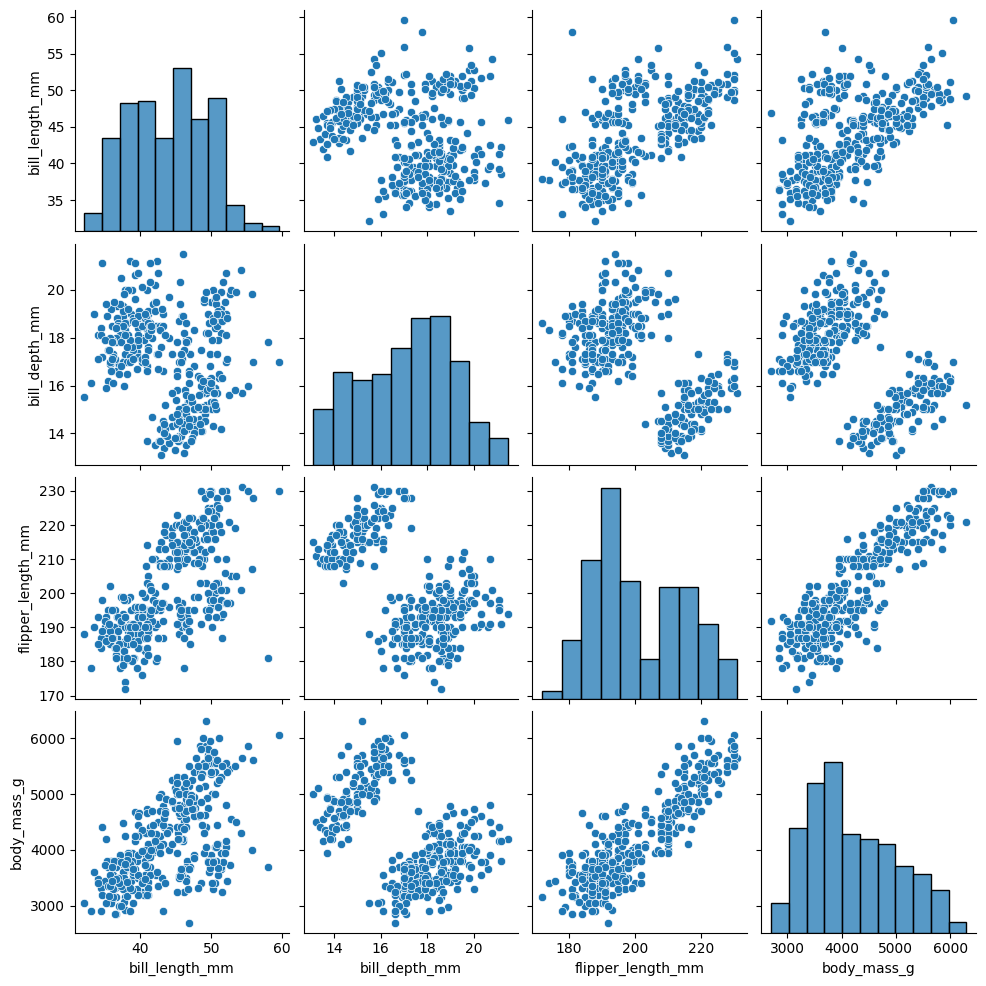

In [3]:
# Check quick with pairplot
# Looks like there is positive correlation in different combinations
# Correlations form strong patterns, there might be different groups that corralate to each other
sns.pairplot(df)

In [4]:
# Check for correlations before removing anything
df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

In [5]:
# Check for NaN values
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# Check for duplicates values
df.duplicated().sum()

0

In [7]:
# Based on small amount of NaN values, we can remove all rows with NaN values
df = df.dropna()
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

In [8]:
# Check for correlations after NaN values are removed
correlations = df.corr(numeric_only=True)
correlations
# Looks like removing NaN values made positive correlations stronger and mixed effect on negative values
# There is strong positive correlations between body mass and flipper length
# Also bill length and flipper length have positive correlations

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

#### More pairploting, with hue to island column

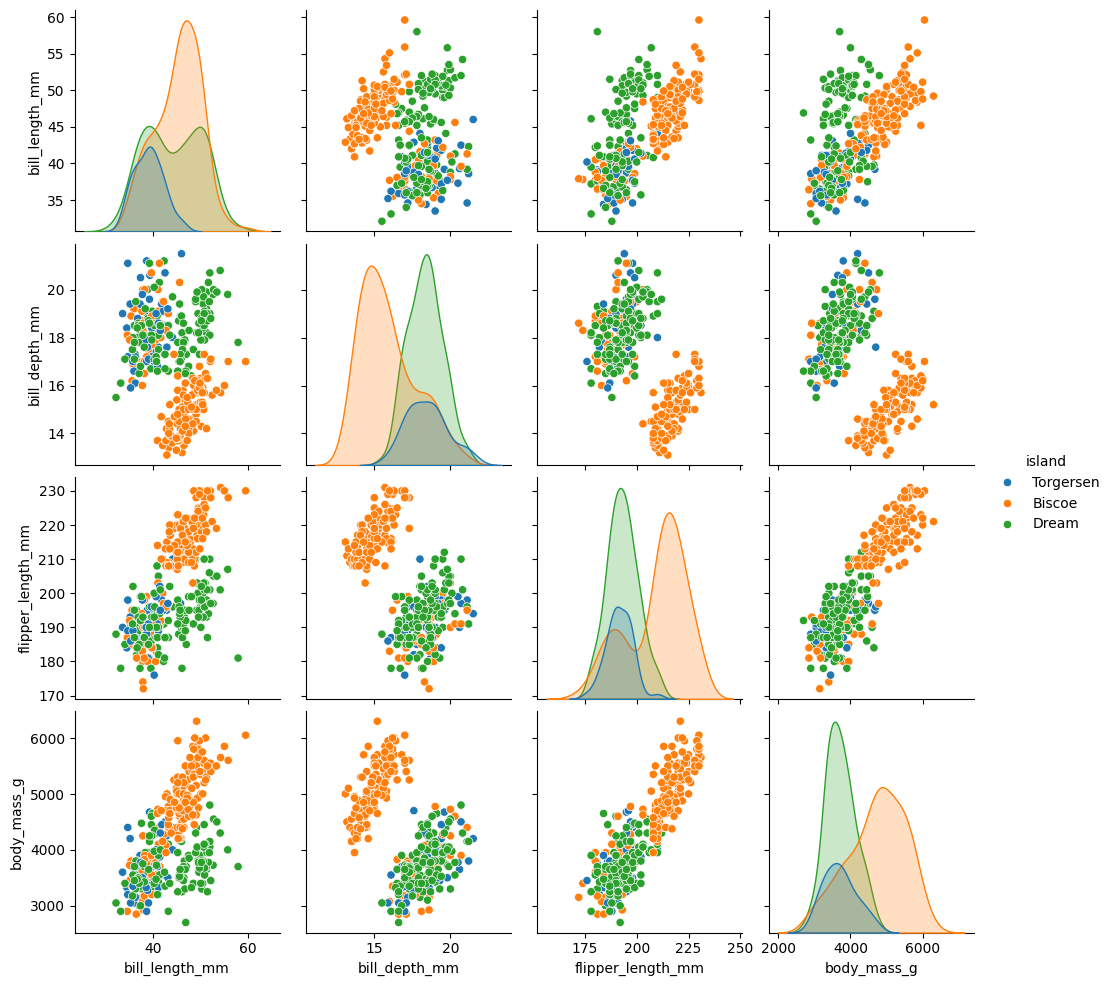

In [9]:
# Use pairplot, hue island
# Looks like almost all value groups form strong packs based on island
# We need more analysis, but looks like different species are living in different islands, especially in Biscoe island
sns.pairplot(df, hue='island')

#### Checking amount of penguins linving on each island

In [10]:
# Check values on penguins on each island
# Torgersen island has least amount of individuals => 47
island = df['island'].value_counts()
island


island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

<Axes: xlabel='island', ylabel='count'>

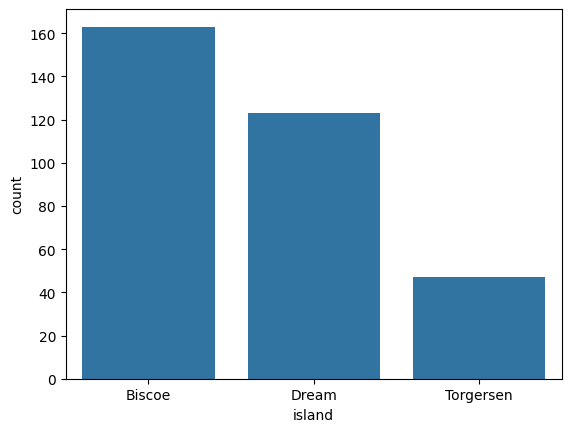

In [11]:
# Visualize island data with barplot
sns.barplot(island)

##### Pairplot with hue on species and sex

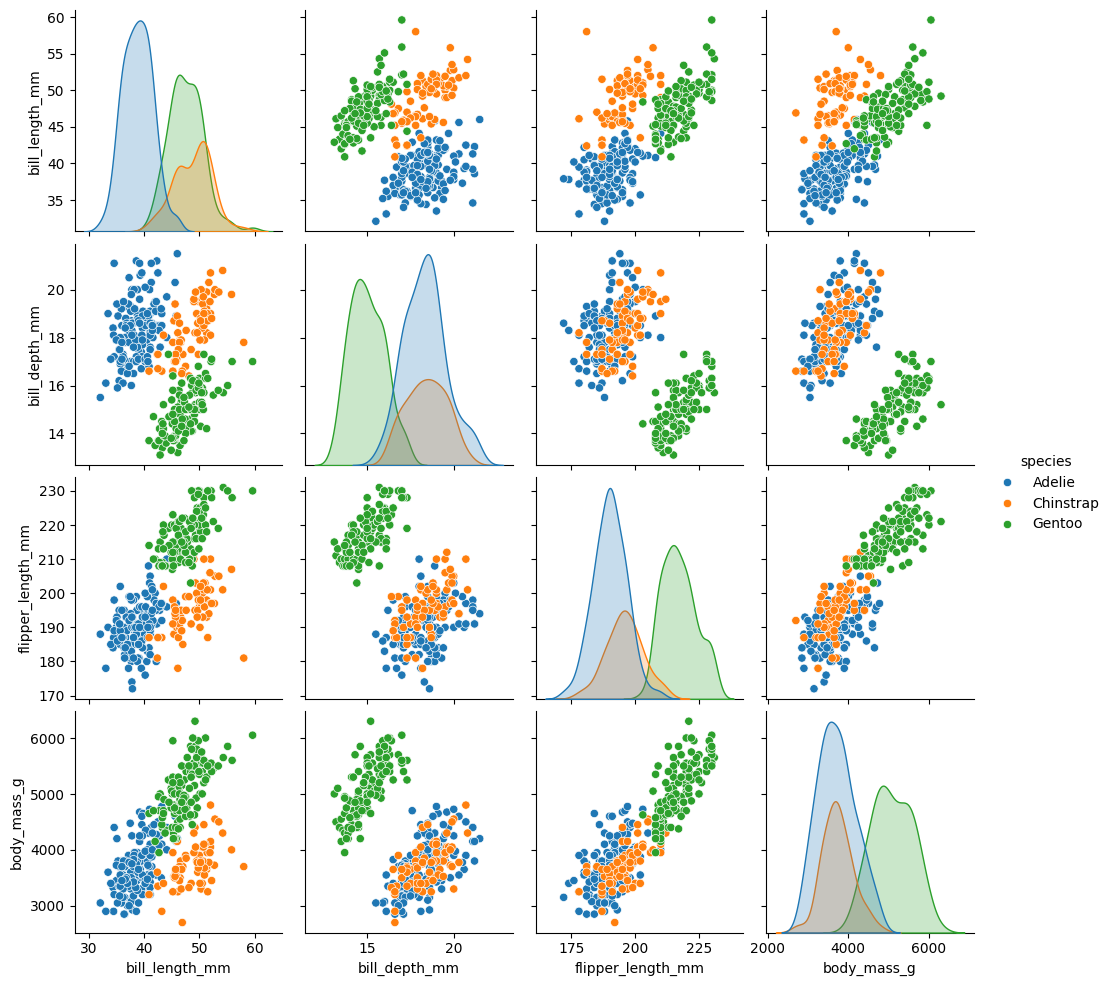

In [12]:
# Pairplot data, use species column as hue
# Looks like distributions are almost identical
# We might say at this point that Gentoo lives in Biscoe island
# Otherwise we need more analysis to make more estimates
sns.pairplot(df, hue='species')

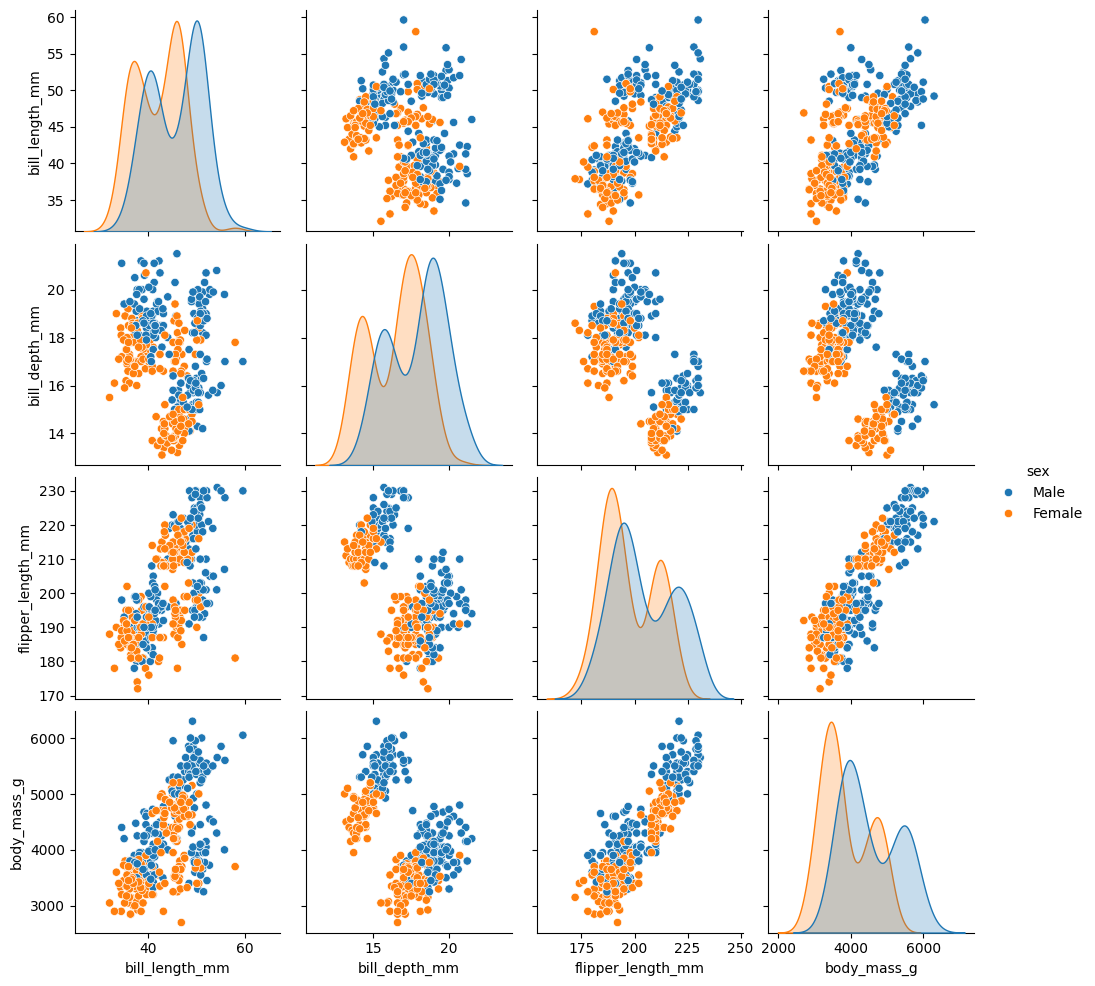

In [13]:
# Pairplot using sex as hue
# We see that two or three distinct groups are formed
# In some cases different species have some common measurements
# Looks like females have generally smaller values in all categories
# Based on this males are larger in size, weight, flipper and bill length and depth with in own species
sns.pairplot(df, hue='sex')

#### Scatterplot data for bill length and flipper length with different hue

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

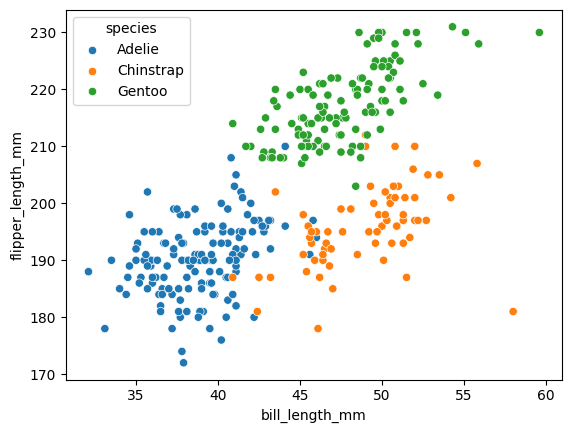

In [14]:
# Scatterplot data with species as hue
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=df)

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

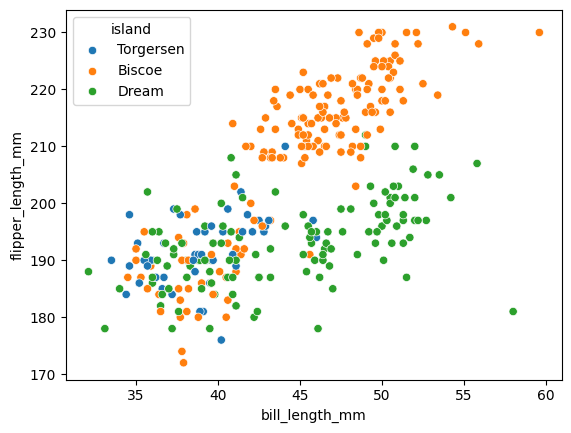

In [15]:
# Scatterplot data with island as hue
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='island', data=df)

We see now that species and islands form own groups, and also datapoint are almost identical.

At this point we can say that Gentoo has longest flipper and bill length and Adelie has smallest flipper and bill length. Chinstrap has medium size flipper and bill of these three species.

This same is also based on islands. Biscoe has longest flipper and bill length, but also smaller values. Torgersen island has only small values. Dream island has small and larger values, but not the largest values.

---

##### Boxplot data comparing species to flipper and bill length and bodymass, using island as hue

<Axes: xlabel='species', ylabel='flipper_length_mm'>

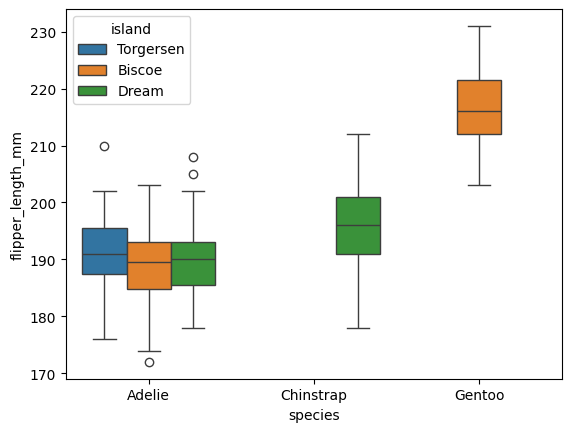

In [16]:
# Boxplot data with flipper length
sns.boxplot(x='species', y='flipper_length_mm', data=df, hue='island')

<Axes: xlabel='species', ylabel='bill_length_mm'>

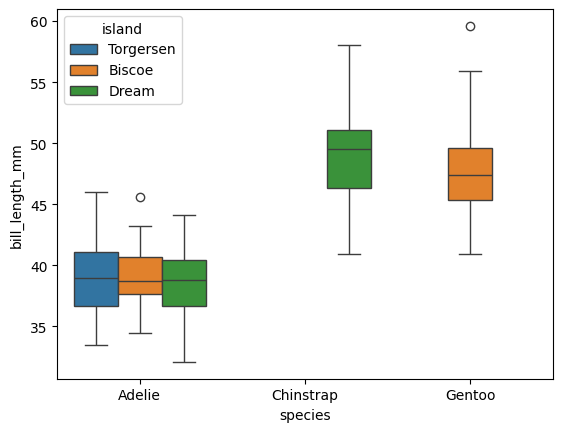

In [17]:
# Boxplot data with bill length
sns.boxplot(x='species', y='bill_length_mm', data=df, hue='island')

<Axes: xlabel='species', ylabel='body_mass_g'>

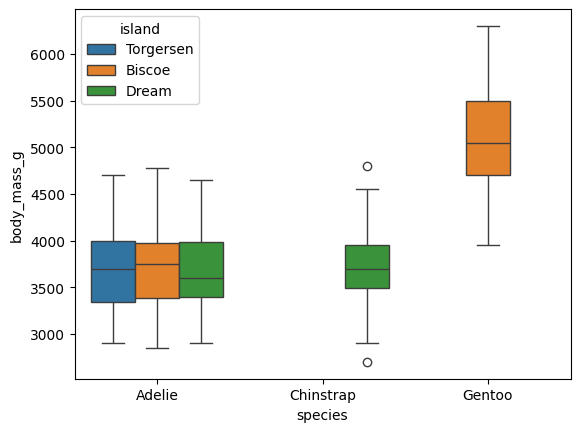

In [18]:
# Boxplot data with body mass
sns.boxplot(x='species', y='body_mass_g', data=df, hue='island')

#### Conclutions:
- Gentoo is the largest of all species and only lives in Biscoe island
    - Has largest body mass and flipper length
    - Bill length is same as Chingstrap
- Chinstrap lives only in Dream island and is same size as Adelie island population, but with more deviation in body mass
    - Bill length is large compared to body mass, same size or larger as Gentoo
    - Flipper length is almost same size as Adelie population
- Adelie lives in all three islands and has smallest body mass of all species
    - Also has smallest flipper and bill length
    - The only species to live in Torgersen island
    - Torgersen island population has surprisingly little deviation in measurements compared to other island populations even it is only (?) penguin species living in that island. Only flipper length is bit larger, this might mean that Torgersen island is harsh habitat and penguins need to swim longer distances to get food.
- As a biological case study this might be significant when comparing different populations of same species in different habitats.

---


<h4><b>2. Miles per gallon dataset from seaborn</b></h4>


In [19]:
# Load dataset 'mpg' from seaborn
df_mpg = sns.load_dataset('mpg')
df_mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa          buick skylark 320  
2            70     usa         plymouth satellite  
3            70     usa              amc rebel sst  
4            70     usa                ford torino  
..          ...     ...                        ...  
393          82     usa            ford mustang gl  
394          82  europe                  vw pickup  
395          82     usa              dodge rampage  
396          82     usa                ford ranger  
397          82     usa                 chevy s-10  

[398 rows x 9 columns]

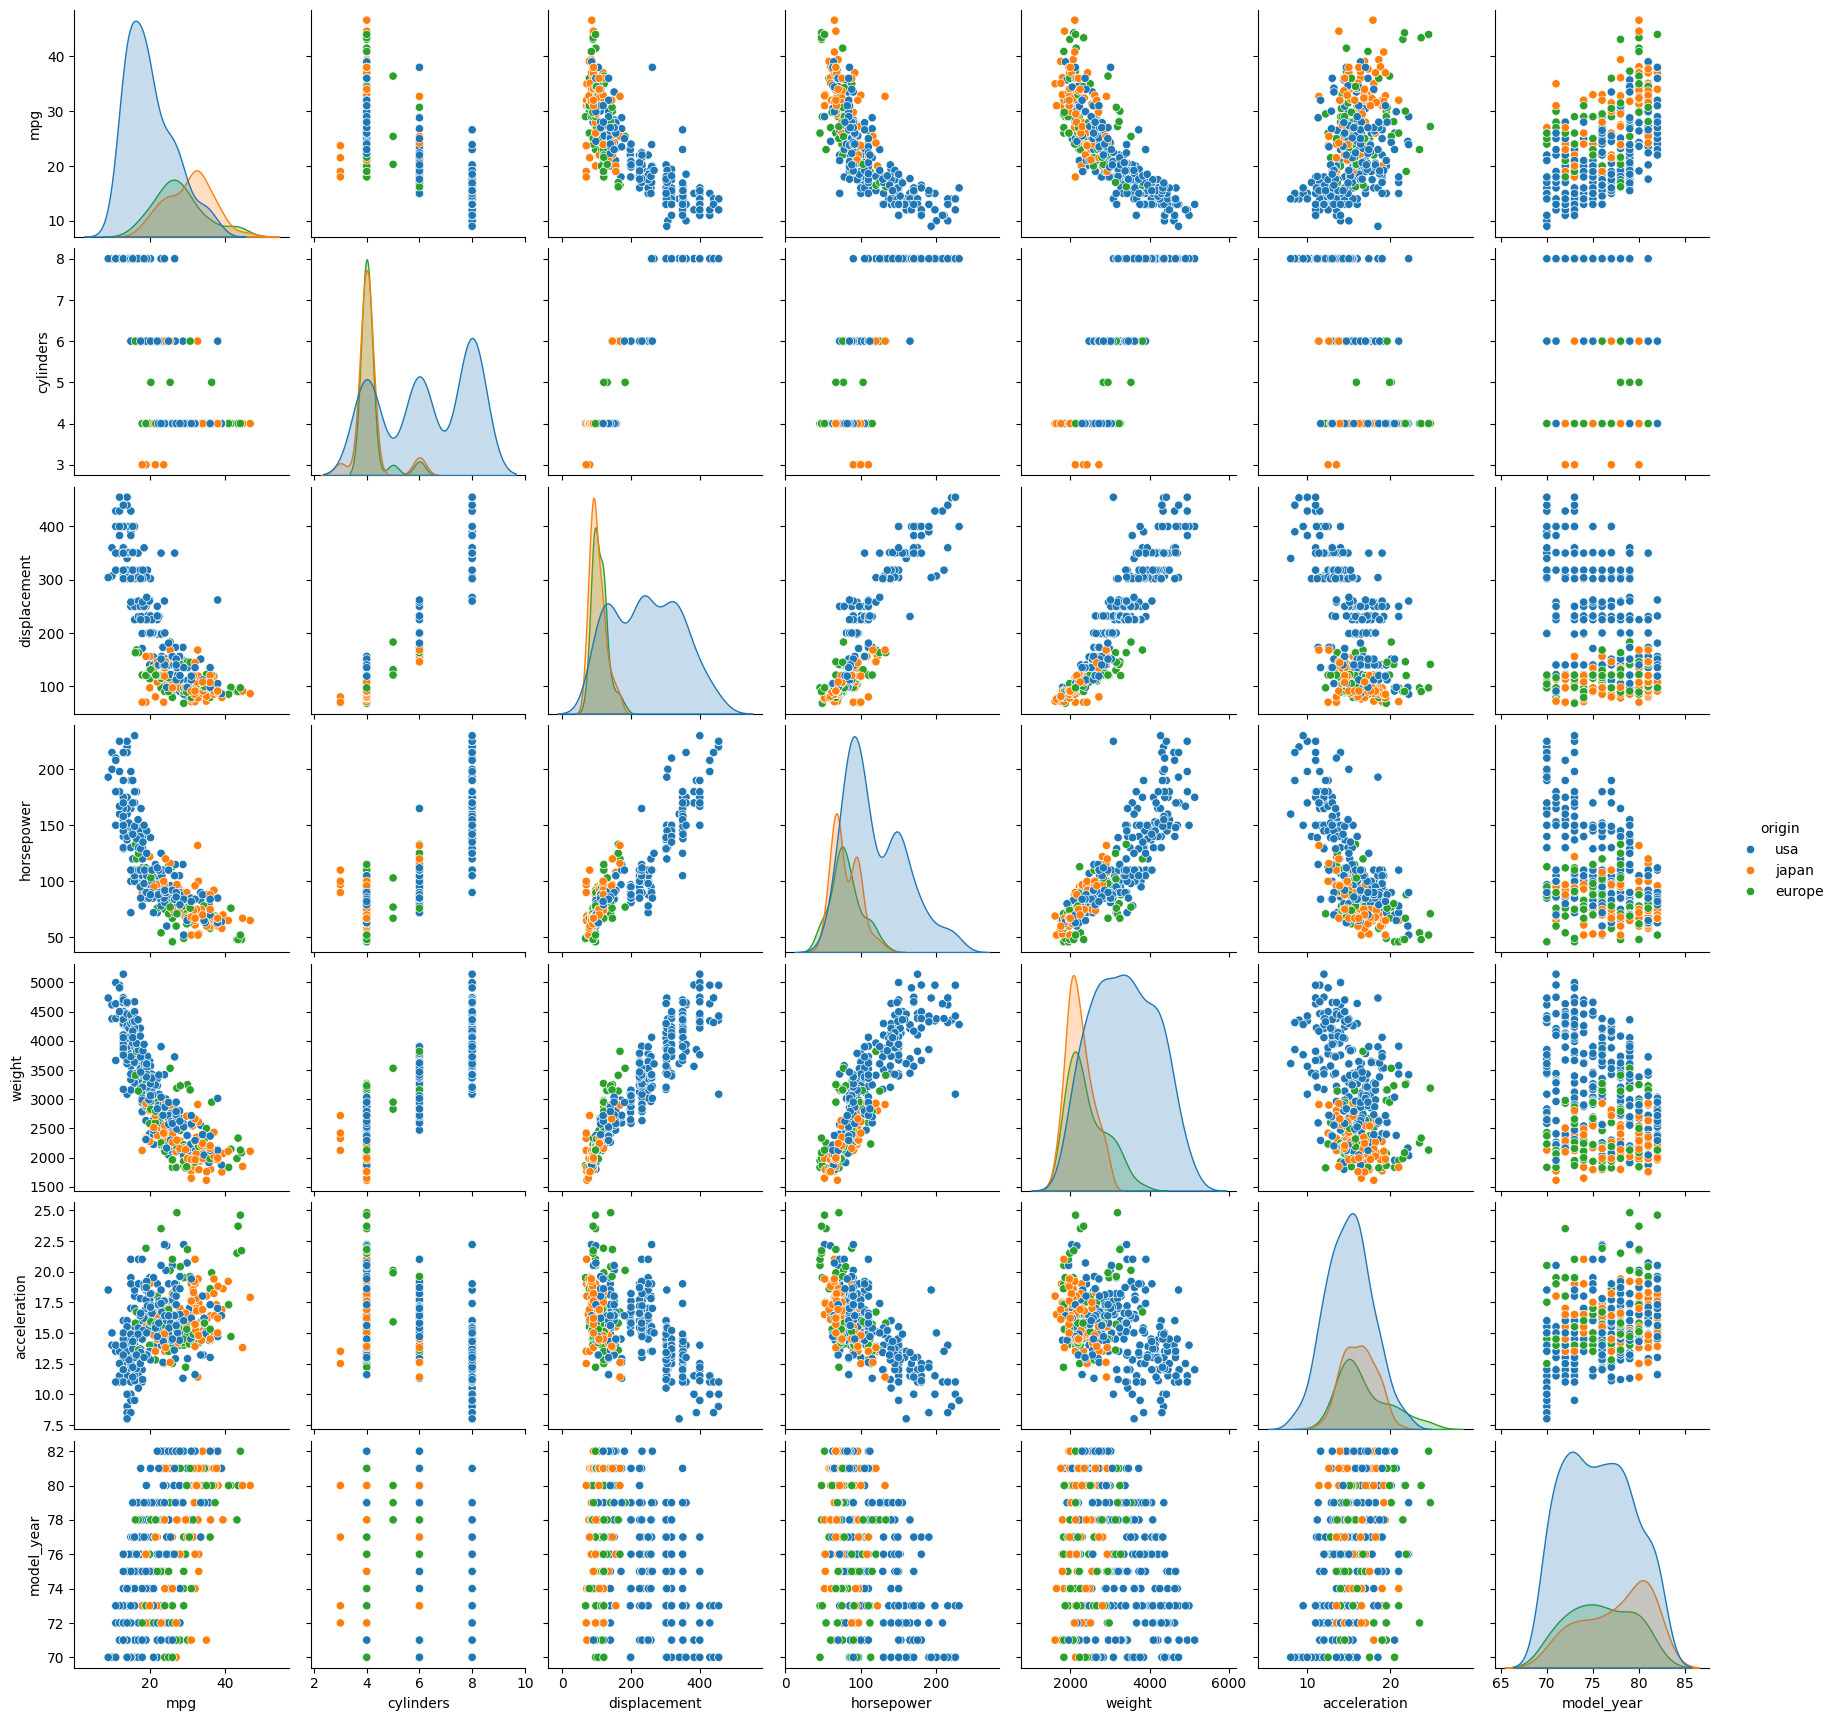

In [20]:
sns.pairplot(df_mpg, hue='origin')

In [21]:
# Create column litres per 100km: 'lp_100km'
# Conversion formula: 1 mail = 1.60934 km, 1 gallon = 3.78541 litres
# Consumption L / 100km = 100 / mpg * 1.60934 * 1 / 3.78541
df_mpg['lp_100km'] = round(100 / (df_mpg['mpg'] * 1.60934 * (1 / 3.78541)), 1)
df_mpg

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  lp_100km  
0            70     usa  chevrolet chevelle malibu      13.1  
1            70     usa          buick skylark 320      15.7  
2            70     usa         plymouth satellite      13.1  
3            70     usa              amc rebel sst      14.7  
4            70     usa                ford torino      13.8  
..          ...     ...                        ...       ...  
393          82     usa            ford mustang gl       8.7  
394          82  europe                  vw pickup       5.3  
395          82     usa              dodge rampage       7.4  
396          82     usa                ford ranger       8.4  
397          82     usa                 chevy s-10       7.6  

[398 rows x 10 columns]

In [22]:
# Remove 'mpg' and 'name' columns
df_mpg = df_mpg.drop(['mpg', 'name'], axis=1)
df_mpg

cylinders  displacement  horsepower  weight  acceleration  model_year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  lp_100km  
0       usa      13.1  
1       usa      15.7  
2       usa      13.1  
3       usa      14.7  
4       usa      13.8  
..      ...       ...  
393     usa       8.7  
394  europe       5.3  
395     usa       7.4  
396     usa       8.4  
397     usa       7.6  

[398 rows x 8 columns]

#### Create corralation matrix and remove unnecessarry columns

In [23]:
# Check correlations
# We should remove 'acceleration' and 'cylinders' columns, because
# Accelaration is combination of horsepower and weight ration, and is more indirect than physical measurements. And has smallest negative correlation.
# Cylinders though are accurate physical feature, but are included in displacement feature all together. And it has smallest positive correlation.
# Model year gives more info about car production
cor = df_mpg.corr(numeric_only=True)
cor

cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950721    0.842983  0.896017     -0.505419   
displacement   0.950721      1.000000    0.897257  0.932824     -0.543684   
horsepower     0.842983      0.897257    1.000000  0.864538     -0.689196   
weight         0.896017      0.932824    0.864538  1.000000     -0.417457   
acceleration  -0.505419     -0.543684   -0.689196 -0.417457      1.000000   
model_year    -0.348746     -0.370164   -0.416361 -0.306564      0.288137   
lp_100km       0.839543      0.866774    0.854688  0.885252     -0.455994   

              model_year  lp_100km  
cylinders      -0.348746  0.839543  
displacement   -0.370164  0.866774  
horsepower     -0.416361  0.854688  
weight         -0.306564  0.885252  
acceleration    0.288137 -0.455994  
model_year      1.000000 -0.557396  
lp_100km       -0.557396  1.000000

In [24]:
# Remove 'acceleration' and 'cylinders' columns
df_mpg = df_mpg.drop(['acceleration', 'cylinders'], axis=1)
df_mpg

displacement  horsepower  weight  model_year  origin  lp_100km
0           307.0       130.0    3504          70     usa      13.1
1           350.0       165.0    3693          70     usa      15.7
2           318.0       150.0    3436          70     usa      13.1
3           304.0       150.0    3433          70     usa      14.7
4           302.0       140.0    3449          70     usa      13.8
..            ...         ...     ...         ...     ...       ...
393         140.0        86.0    2790          82     usa       8.7
394          97.0        52.0    2130          82  europe       5.3
395         135.0        84.0    2295          82     usa       7.4
396         120.0        79.0    2625          82     usa       8.4
397         119.0        82.0    2720          82     usa       7.6

[398 rows x 6 columns]

In [25]:
# Check correlations again
cor = df_mpg.corr(numeric_only=True)
cor

displacement  horsepower    weight  model_year  lp_100km
displacement      1.000000    0.897257  0.932824   -0.370164  0.866774
horsepower        0.897257    1.000000  0.864538   -0.416361  0.854688
weight            0.932824    0.864538  1.000000   -0.306564  0.885252
model_year       -0.370164   -0.416361 -0.306564    1.000000 -0.557396
lp_100km          0.866774    0.854688  0.885252   -0.557396  1.000000

<Axes: >

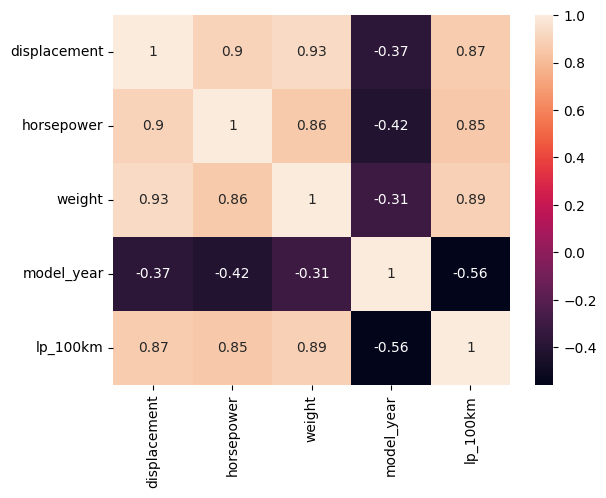

In [26]:
# Create heatmap
sns.heatmap(data=cor, annot=True)

#### Select one column to represent car efficiency and drop others

In [27]:
# Select one column for representative
# Looks like 'displacement' would be best candidate
# Because it is combination of motor power
# Horsepower (brake horsepower bhp) column has little bit lower correlation and techically is combination of motor and transmission --> more indirect
# Weight column has almost equal correlations and is strongly connected to displacement (0.93 correlation).
# Looks like more heavier cars have more powerful/effective motor and hence you could say they go hand in hand.
# Weight itself is combination of many things not direct measurement of car efficiency or performance
# But lighter cars can have larger motors and thereby consume more fuel.
# Also displacement is a motor feature and hence measurement of efficiency
df_mpg = df_mpg.drop(['horsepower', 'weight'], axis=1)
df_mpg

displacement  model_year  origin  lp_100km
0           307.0          70     usa      13.1
1           350.0          70     usa      15.7
2           318.0          70     usa      13.1
3           304.0          70     usa      14.7
4           302.0          70     usa      13.8
..            ...         ...     ...       ...
393         140.0          82     usa       8.7
394          97.0          82  europe       5.3
395         135.0          82     usa       7.4
396         120.0          82     usa       8.4
397         119.0          82     usa       7.6

[398 rows x 4 columns]

#### Pairplot data using origin as hue

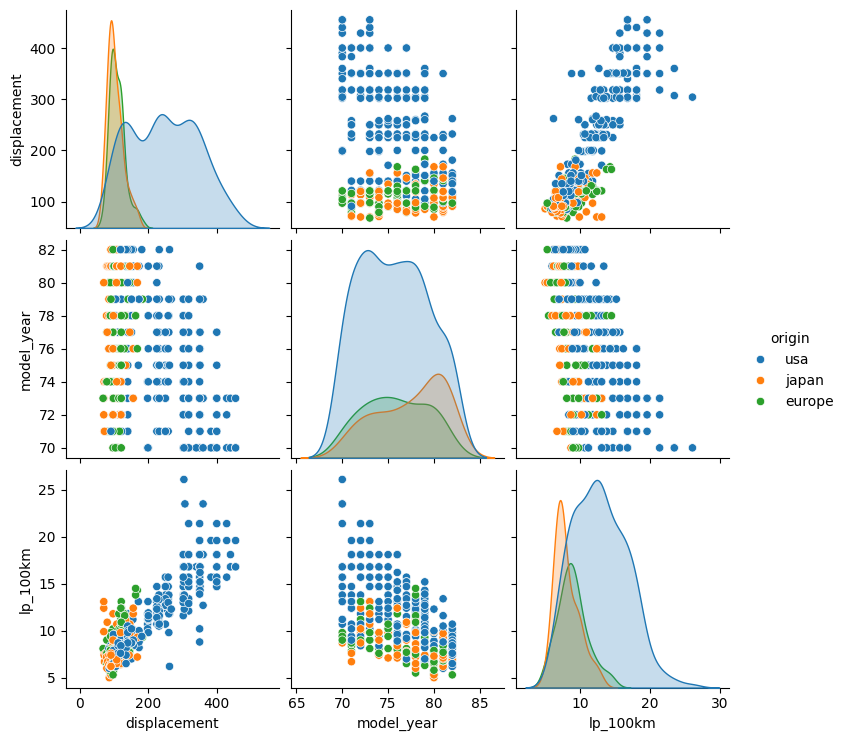

In [28]:
# Pairplot data using origin as hue
# Usa made cars have bigest fuel consumption.
# Looks like japanise cars have lowest fuel consumption. We nee more analysis to be accurate.
# Model year has some correlation but large variance. 
sns.pairplot(data=df_mpg, hue='origin')

<Axes: xlabel='origin', ylabel='displacement'>

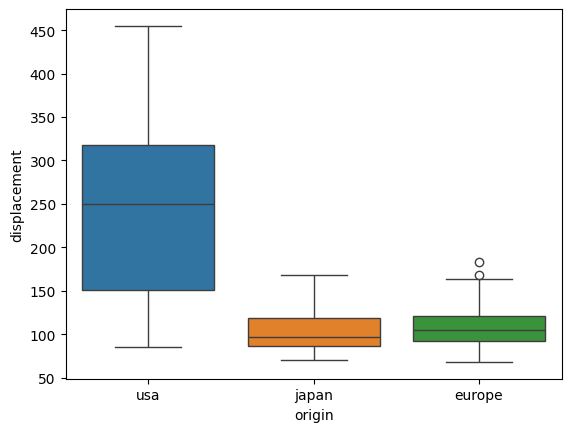

In [29]:
# This picture shows how this data works.
# USA made cars have by far the biggest displacement but also largest variance.
# European and Japanise cars have smaller displacement and less variance.
sns.boxplot(x='origin', y='displacement', data=df_mpg, hue='origin')

<Axes: xlabel='origin', ylabel='lp_100km'>

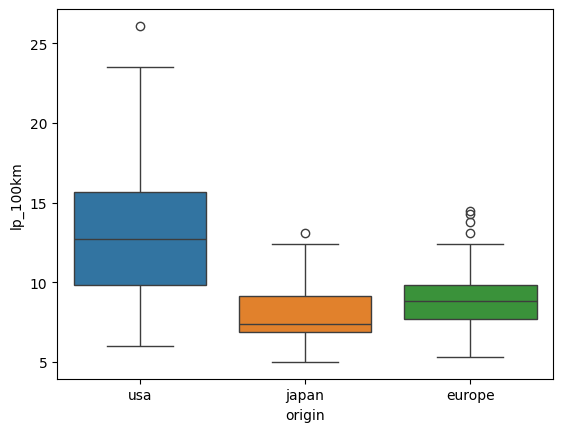

In [30]:
# USA cars have largest fuel consumption
# Japanise cars have smallest full consumption and motor power - fuel consumption ratio is little bit better than in European cars.
sns.boxplot(x='origin', y='lp_100km', data=df_mpg, hue='origin')

---

#### **Groceries data**


In [31]:
# Download groceries data set from csv file
groceries = pd.read_csv('groceries.csv')
groceries

Month  Rice  Wheat  Barley  Corn  Peanuts   Sugar  Coconut-oil  \
0    Oct-90  0.28   0.11    0.09  0.10     2.12  0.0049         0.28   
1    Nov-90  0.27   0.11    0.09  0.10     2.11  0.0049         0.34   
2    Dec-90  0.26   0.11    0.09  0.10     2.00  0.0046         0.32   
3    Jan-91  0.30   0.11    0.09  0.11     1.85  0.0042         0.34   
4    Feb-91  0.33   0.11    0.09  0.11     1.79  0.0042         0.33   
..      ...   ...    ...     ...   ...      ...     ...          ...   
355  May-20  0.51   0.21    0.08  0.14     2.05  0.0053         0.83   
356  Jun-20  0.52   0.20    0.08  0.15     2.05  0.0060         0.92   
357  Jul-20  0.48   0.20    0.08  0.15     1.99  0.0060         0.89   
358  Aug-20  0.50   0.20    0.08  0.15     1.30  0.0064         0.98   
359  Sep-20  0.51   0.20    0.08  0.17     1.68  0.0062         1.03   

     Palm-oil  Sunflower-oil  Chicken    Beef    Pork  Fish   Tea  Coffee  
0        0.29           0.58   0.0236  0.0571  2.5051  6.35  1.60    1.24  
1        0.33           0.56   0.0236  0.0558  2.4414  6.46  1.58    1.22  
2        0.35           0.55   0.0231  0.0562  2.3479  6.50  1.52    1.24  
3        0.35           0.57   0.0231  0.0571  2.6495  6.34  1.55    1.16  
4        0.34           0.60   0.0238  0.0602  2.3517  6.41  1.48    1.14  
..        ...            ...      ...     ...     ...   ...   ...     ...  
355      0.58            NaN   0.0335  0.1120     NaN   NaN  1.97    1.42  
356      0.66            NaN   0.0346  0.1124     NaN   NaN  1.86    1.42  
357      0.69            NaN   0.0335  0.1036     NaN   NaN  1.78    1.49  
358      0.76            NaN   0.0331  0.1021     NaN   NaN  2.00    1.60  
359      0.80            NaN   0.0324  0.1014     NaN   NaN  2.05    1.60  

[360 rows x 16 columns]

In [32]:
# Check NaN values
groceries.isna().sum()

Month              0
Rice               0
Wheat              0
Barley             0
Corn               0
Peanuts            0
Sugar              0
Coconut-oil        0
Palm-oil           0
Sunflower-oil    141
Chicken            0
Beef               0
Pork              39
Fish              39
Tea                0
Coffee             0
dtype: int64

#### Fill missing values in columns

In [33]:
# Fill NaN values with column means
# Sunflower-oil value is affected the most, because amount of missing values --> not accurate in later dates
# Round fill values to same decimal as orginal
groceries['Sunflower-oil'].fillna(round((groceries['Sunflower-oil'].mean()), 2), inplace=True)
groceries['Pork'].fillna(round((groceries['Pork'].mean()), 4), inplace=True)
groceries['Fish'].fillna(round((groceries['Fish'].mean()), 2), inplace=True)
groceries

Month  Rice  Wheat  Barley  Corn  Peanuts   Sugar  Coconut-oil  \
0    Oct-90  0.28   0.11    0.09  0.10     2.12  0.0049         0.28   
1    Nov-90  0.27   0.11    0.09  0.10     2.11  0.0049         0.34   
2    Dec-90  0.26   0.11    0.09  0.10     2.00  0.0046         0.32   
3    Jan-91  0.30   0.11    0.09  0.11     1.85  0.0042         0.34   
4    Feb-91  0.33   0.11    0.09  0.11     1.79  0.0042         0.33   
..      ...   ...    ...     ...   ...      ...     ...          ...   
355  May-20  0.51   0.21    0.08  0.14     2.05  0.0053         0.83   
356  Jun-20  0.52   0.20    0.08  0.15     2.05  0.0060         0.92   
357  Jul-20  0.48   0.20    0.08  0.15     1.99  0.0060         0.89   
358  Aug-20  0.50   0.20    0.08  0.15     1.30  0.0064         0.98   
359  Sep-20  0.51   0.20    0.08  0.17     1.68  0.0062         1.03   

     Palm-oil  Sunflower-oil  Chicken    Beef    Pork  Fish   Tea  Coffee  
0        0.29           0.58   0.0236  0.0571  2.5051  6.35  1.60    1.24  
1        0.33           0.56   0.0236  0.0558  2.4414  6.46  1.58    1.22  
2        0.35           0.55   0.0231  0.0562  2.3479  6.50  1.52    1.24  
3        0.35           0.57   0.0231  0.0571  2.6495  6.34  1.55    1.16  
4        0.34           0.60   0.0238  0.0602  2.3517  6.41  1.48    1.14  
..        ...            ...      ...     ...     ...   ...   ...     ...  
355      0.58           0.91   0.0335  0.1120  1.5003  4.81  1.97    1.42  
356      0.66           0.91   0.0346  0.1124  1.5003  4.81  1.86    1.42  
357      0.69           0.91   0.0335  0.1036  1.5003  4.81  1.78    1.49  
358      0.76           0.91   0.0331  0.1021  1.5003  4.81  2.00    1.60  
359      0.80           0.91   0.0324  0.1014  1.5003  4.81  2.05    1.60  

[360 rows x 16 columns]

#### Create custom functions and import module

In [34]:
# Helper function for converting Month column to more usable values
import calendar


# First function to fix the month, return integer of given row
def change_month(row):
    return list(calendar.month_abbr).index(row['Month'])


# Second function
# Replace current year value with real year representation
def fill_year(row):
    year = int(row['Year'])
    if year > 50:
        return int(f"19{row['Year']}")
    else:
        return int(f"20{row['Year']}")

In [35]:
# Create new column and replace old 'Month' column values
# str.split returns separate columns when expand is True
groceries[['Month', 'Year']] = groceries['Month'].str.split('-', expand=True)
groceries

Month  Rice  Wheat  Barley  Corn  Peanuts   Sugar  Coconut-oil  Palm-oil  \
0     Oct  0.28   0.11    0.09  0.10     2.12  0.0049         0.28      0.29   
1     Nov  0.27   0.11    0.09  0.10     2.11  0.0049         0.34      0.33   
2     Dec  0.26   0.11    0.09  0.10     2.00  0.0046         0.32      0.35   
3     Jan  0.30   0.11    0.09  0.11     1.85  0.0042         0.34      0.35   
4     Feb  0.33   0.11    0.09  0.11     1.79  0.0042         0.33      0.34   
..    ...   ...    ...     ...   ...      ...     ...          ...       ...   
355   May  0.51   0.21    0.08  0.14     2.05  0.0053         0.83      0.58   
356   Jun  0.52   0.20    0.08  0.15     2.05  0.0060         0.92      0.66   
357   Jul  0.48   0.20    0.08  0.15     1.99  0.0060         0.89      0.69   
358   Aug  0.50   0.20    0.08  0.15     1.30  0.0064         0.98      0.76   
359   Sep  0.51   0.20    0.08  0.17     1.68  0.0062         1.03      0.80   

     Sunflower-oil  Chicken    Beef    Pork  Fish   Tea  Coffee Year  
0             0.58   0.0236  0.0571  2.5051  6.35  1.60    1.24   90  
1             0.56   0.0236  0.0558  2.4414  6.46  1.58    1.22   90  
2             0.55   0.0231  0.0562  2.3479  6.50  1.52    1.24   90  
3             0.57   0.0231  0.0571  2.6495  6.34  1.55    1.16   91  
4             0.60   0.0238  0.0602  2.3517  6.41  1.48    1.14   91  
..             ...      ...     ...     ...   ...   ...     ...  ...  
355           0.91   0.0335  0.1120  1.5003  4.81  1.97    1.42   20  
356           0.91   0.0346  0.1124  1.5003  4.81  1.86    1.42   20  
357           0.91   0.0335  0.1036  1.5003  4.81  1.78    1.49   20  
358           0.91   0.0331  0.1021  1.5003  4.81  2.00    1.60   20  
359           0.91   0.0324  0.1014  1.5003  4.81  2.05    1.60   20  

[360 rows x 17 columns]

In [36]:
# Apply helper functions to modify Month and Year column
groceries['Month'] = groceries.apply(change_month, axis=1)
groceries['Year'] = groceries.apply(fill_year, axis=1)
groceries

Month  Rice  Wheat  Barley  Corn  Peanuts   Sugar  Coconut-oil  Palm-oil  \
0       10  0.28   0.11    0.09  0.10     2.12  0.0049         0.28      0.29   
1       11  0.27   0.11    0.09  0.10     2.11  0.0049         0.34      0.33   
2       12  0.26   0.11    0.09  0.10     2.00  0.0046         0.32      0.35   
3        1  0.30   0.11    0.09  0.11     1.85  0.0042         0.34      0.35   
4        2  0.33   0.11    0.09  0.11     1.79  0.0042         0.33      0.34   
..     ...   ...    ...     ...   ...      ...     ...          ...       ...   
355      5  0.51   0.21    0.08  0.14     2.05  0.0053         0.83      0.58   
356      6  0.52   0.20    0.08  0.15     2.05  0.0060         0.92      0.66   
357      7  0.48   0.20    0.08  0.15     1.99  0.0060         0.89      0.69   
358      8  0.50   0.20    0.08  0.15     1.30  0.0064         0.98      0.76   
359      9  0.51   0.20    0.08  0.17     1.68  0.0062         1.03      0.80   

     Sunflower-oil  Chicken    Beef    Pork  Fish   Tea  Coffee  Year  
0             0.58   0.0236  0.0571  2.5051  6.35  1.60    1.24  1990  
1             0.56   0.0236  0.0558  2.4414  6.46  1.58    1.22  1990  
2             0.55   0.0231  0.0562  2.3479  6.50  1.52    1.24  1990  
3             0.57   0.0231  0.0571  2.6495  6.34  1.55    1.16  1991  
4             0.60   0.0238  0.0602  2.3517  6.41  1.48    1.14  1991  
..             ...      ...     ...     ...   ...   ...     ...   ...  
355           0.91   0.0335  0.1120  1.5003  4.81  1.97    1.42  2020  
356           0.91   0.0346  0.1124  1.5003  4.81  1.86    1.42  2020  
357           0.91   0.0335  0.1036  1.5003  4.81  1.78    1.49  2020  
358           0.91   0.0331  0.1021  1.5003  4.81  2.00    1.60  2020  
359           0.91   0.0324  0.1014  1.5003  4.81  2.05    1.60  2020  

[360 rows x 17 columns]

#### Create correlation matrix and heatmap

In [37]:
# Check correlations
corr = groceries.corr(numeric_only=True)
corr

Month      Rice     Wheat    Barley      Corn   Peanuts  \
Month          1.000000 -0.044979 -0.013236 -0.030244 -0.044408 -0.001781   
Rice          -0.044979  1.000000  0.764992  0.725854  0.820150  0.696030   
Wheat         -0.013236  0.764992  1.000000  0.892162  0.890443  0.580613   
Barley        -0.030244  0.725854  0.892162  1.000000  0.907648  0.609116   
Corn          -0.044408  0.820150  0.890443  0.907648  1.000000  0.710431   
Peanuts       -0.001781  0.696030  0.580613  0.609116  0.710431  1.000000   
Sugar          0.003578  0.704375  0.640290  0.620424  0.755538  0.611945   
Coconut-oil   -0.040258  0.646414  0.618246  0.529652  0.680974  0.603114   
Palm-oil      -0.046552  0.793909  0.822121  0.792855  0.837823  0.684083   
Sunflower-oil -0.005622 -0.088971 -0.068062 -0.029658  0.001226 -0.160845   
Chicken       -0.015935  0.652289  0.646178  0.619077  0.678824  0.498765   
Beef           0.006254  0.616056  0.528809  0.432840  0.615079  0.628254   
Pork          -0.049440  0.348905  0.398450  0.386440  0.479252  0.439300   
Fish          -0.080336  0.473463  0.407105  0.296818  0.466517  0.393765   
Tea           -0.030672  0.643568  0.477763  0.507331  0.631756  0.549859   
Coffee        -0.000688  0.567478  0.547567  0.448200  0.562999  0.420156   
Year          -0.037605  0.599948  0.521170  0.485134  0.570409  0.511999   

                  Sugar  Coconut-oil  Palm-oil  Sunflower-oil   Chicken  \
Month          0.003578    -0.040258 -0.046552      -0.005622 -0.015935   
Rice           0.704375     0.646414  0.793909      -0.088971  0.652289   
Wheat          0.640290     0.618246  0.822121      -0.068062  0.646178   
Barley         0.620424     0.529652  0.792855      -0.029658  0.619077   
Corn           0.755538     0.680974  0.837823       0.001226  0.678824   
Peanuts        0.611945     0.603114  0.684083      -0.160845  0.498765   
Sugar          1.000000     0.691739  0.761629      -0.084708  0.564009   
Coconut-oil    0.691739     1.000000  0.835128       0.000962  0.659971   
Palm-oil       0.761629     0.835128  1.000000      -0.092183  0.645418   
Sunflower-oil -0.084708     0.000962 -0.092183       1.000000  0.035272   
Chicken        0.564009     0.659971  0.645418       0.035272  1.000000   
Beef           0.566042     0.662576  0.560498      -0.180766  0.775428   
Pork           0.376719     0.276650  0.278542       0.021950  0.330934   
Fish           0.607992     0.608934  0.506450      -0.315479  0.389630   
Tea            0.673708     0.662326  0.620940      -0.002030  0.686083   
Coffee         0.584662     0.612844  0.709686      -0.099124  0.394202   
Year           0.514721     0.646190  0.574697       0.038854  0.873402   

                   Beef      Pork      Fish       Tea    Coffee      Year  
Month          0.006254 -0.049440 -0.080336 -0.030672 -0.000688 -0.037605  
Rice           0.616056  0.348905  0.473463  0.643568  0.567478  0.599948  
Wheat          0.528809  0.398450  0.407105  0.477763  0.547567  0.521170  
Barley         0.432840  0.386440  0.296818  0.507331  0.448200  0.485134  
Corn           0.615079  0.479252  0.466517  0.631756  0.562999  0.570409  
Peanuts        0.628254  0.439300  0.393765  0.549859  0.420156  0.511999  
Sugar          0.566042  0.376719  0.607992  0.673708  0.584662  0.514721  
Coconut-oil    0.662576  0.276650  0.608934  0.662326  0.612844  0.646190  
Palm-oil       0.560498  0.278542  0.506450  0.620940  0.709686  0.574697  
Sunflower-oil -0.180766  0.021950 -0.315479 -0.002030 -0.099124  0.038854  
Chicken        0.775428  0.330934  0.389630  0.686083  0.394202  0.873402  
Beef           1.000000  0.393443  0.575522  0.662769  0.368481  0.830306  
Pork           0.393443  1.000000  0.387126  0.153005  0.207062  0.161152  
Fish           0.575522  0.387126  1.000000  0.458384  0.486002  0.348668  
Tea            0.662769  0.153005  0.458384  1.000000  0.404609  0.707858  
Coffee         0.368481  0.207062  0.486002  0.404609  1.000000 

<Axes: >

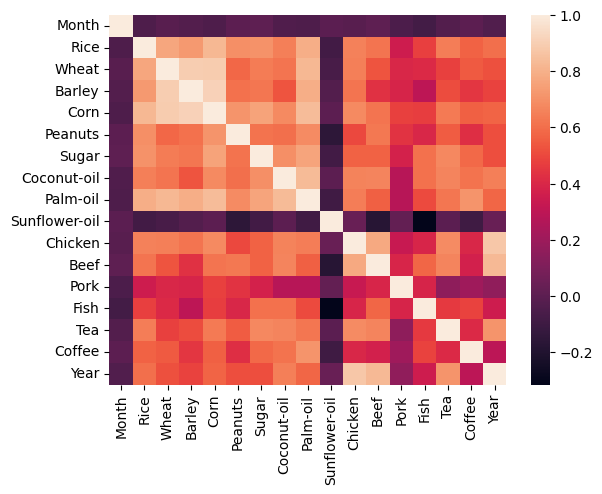

In [38]:
# Create heatmap of correlations
# Sunflower-oil doesn't seem to have any correlations to other products
# We have to remember that 141/360 =~ 39% were missing values
# Wheat, barley and corn seem to have strong correlation, they usually grow in same areas and are farmed similarly
# Also chicken and beef seen to correlate to year, so price might have got up by the year
sns.heatmap(data=corr)

#### Bonus task for groceries

<Axes: xlabel='Year', ylabel='Month'>

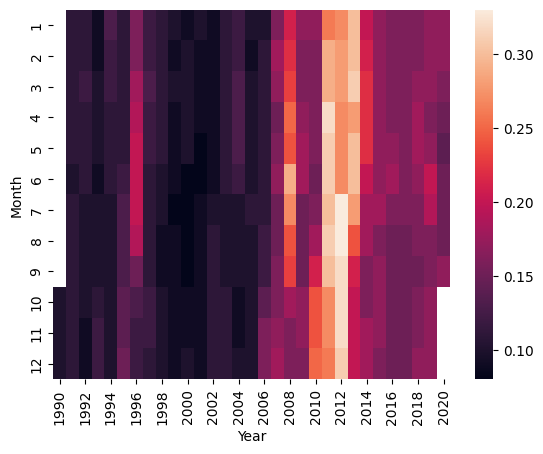

In [39]:
# Check some single product and its price history in heatmap
# Corn price has got up in 2012
# https://www.bls.gov/opub/ted/2012/ted_20121128.htm
# Data shows that there was severe drought in US and it affected the price
gp = groceries.pivot_table(index="Month", columns="Year", values='Corn')
sns.heatmap(gp)

<h4><b>4. csv-data, pandas and seaborn, mobile phone data, regression plots</b></h4>


In [40]:
# Load data set from csv file
phones = pd.read_csv('mobilephones.csv')
phones

Brand  BatteryCapacity  RAM  ScreenSize  Price
0      Apple             3095    6        6.10    999
1    Samsung             5000   12        6.80   1199
2     Xiaomi             5020    6        6.67    279
3      Apple             2815    4        6.10    799
4    Samsung             3300    8        6.70    999
..       ...              ...  ...         ...    ...
179  Samsung             4500    6        6.50    449
180  Samsung             4300    8        6.70   1049
181   Xiaomi             4160    6        6.57    349
182    Apple             3687    6        6.70   1099
183  Samsung             4500    6        6.70    649

[184 rows x 5 columns]

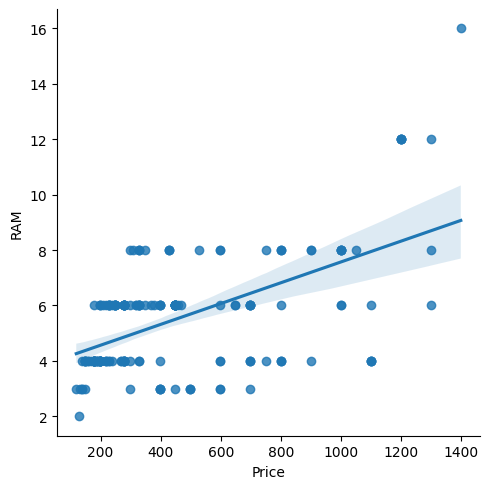

In [41]:
# Regression plot with price and ram
# There is some positive correlation between price and ram, but values are scattered
sns.lmplot(data=phones, x='Price', y='RAM')

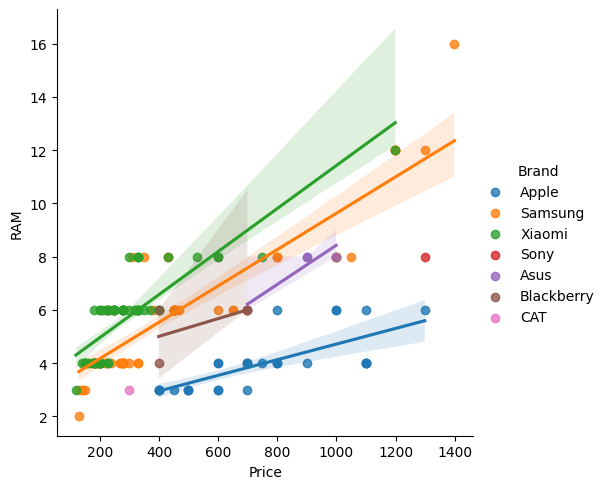

In [42]:
# Regression plot with price and ram, brand as hue
# Now we see that brands have strong almost linear correlations, except for Apple and Blackberry (also large confidence interval)
sns.lmplot(data=phones, x='Price', y='RAM', hue='Brand')

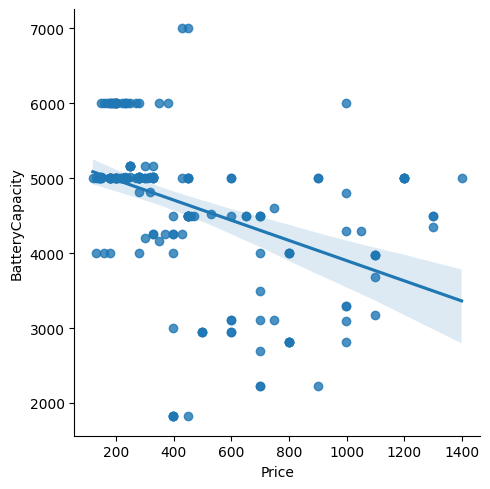

In [43]:
# Regression plot with price and battery capacity, no hue
# Looks like there is negative correlation between price and battery capacity, but large deviation
sns.lmplot(data=phones, x='Price', y='BatteryCapacity')

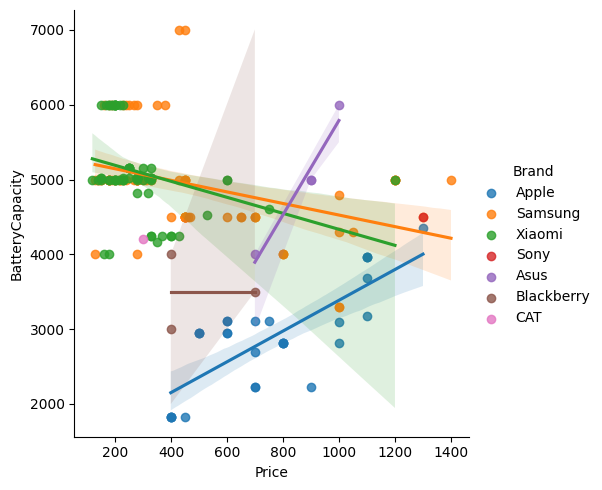

In [44]:
# Regression plot with price and batery capacity, brand as hue
# There is big difference in brands. Best positive correlation is with Apple
# With popular Android brands (Samsung, Xiaomi) there is negative correlation, but large deviation
sns.lmplot(data=phones, x='Price', y='BatteryCapacity', hue='Brand')

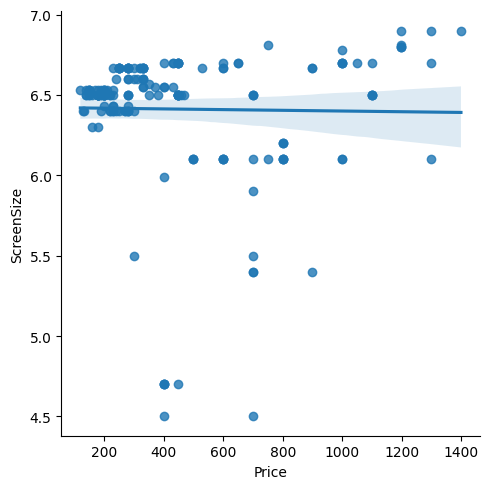

In [45]:
# Regression plot with price and screen size
# At first glance there is no correlation between price and screen size
sns.lmplot(data=phones, x='Price', y='ScreenSize')

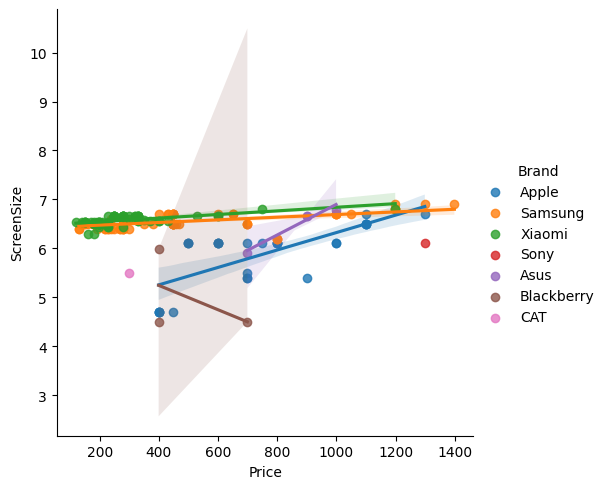

In [46]:
# Regression plot with price and screen size, brand as hue
# There is big difference in brands. Best correlation is with Apple --> more expensive phones have larger screens
# Other brands don't correlate that well
sns.lmplot(data=phones, x='Price', y='ScreenSize', hue='Brand')


### **Advanced extra exercises**

#### 1. Try boxenplot with photo dataset

<Axes: xlabel='RAM', ylabel='Price'>

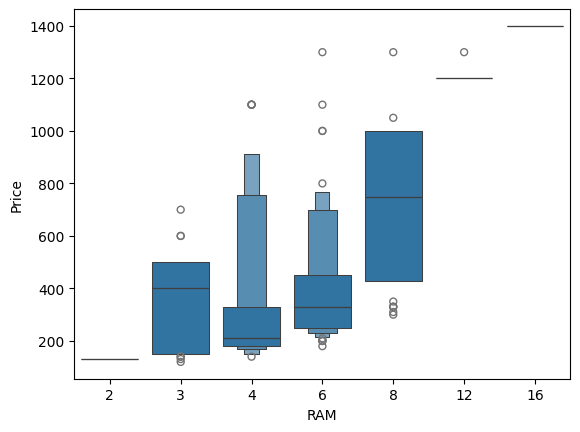

In [47]:
# Boxenplot with RAM and price, no hue
# We see that there is correlation, but large deviation in popular RAM classes (4, 6)
# Also popular price range (200-400) has most of the products
sns.boxenplot(data=phones, x='RAM', y='Price')

<Axes: xlabel='RAM', ylabel='Price'>

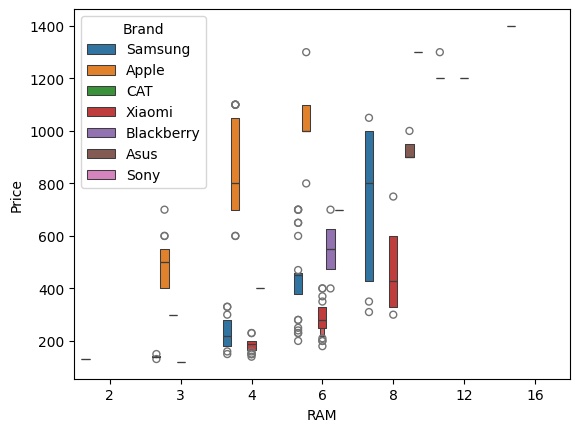

In [48]:
# Boxenplot with RAM and price, hue as brand
# Now we see the difference between Apple and Android devices
# Apple has less RAM than android and is more expensive
# Android also starts at lower prices with more RAM
sns.boxenplot(data=phones, x='RAM', y='Price', hue='Brand')

#### 2. Titanic dataset in own notebook file ---> extra_exercise_set_3.ipynb